In [128]:
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

import requests
from bs4 import BeautifulSoup
msh = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding='latin1')



In [129]:
display(msh.head())
police = msh[['Injured']]
police

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


,Injured
0,20
1,0
2,3
3,527
4,2
...,...
318,3
319,13
320,4
321,1


In [130]:
print(msh.iloc[80])

S#                                                                     81
Title                                        San Bernardino mass shooting
Location                                       San Bernardino, California
Date                                                            12/2/2015
Incident Area                                             Christmas Party
Open/Close Location                                                 Close
Target                                                             random
Cause                                                           terrorism
Summary                 Syed Rizwan Farook left a Christmas party held...
Fatalities                                                             14
Injured                                                                21
Total victims                                                          35
Policeman Killed                                                        0
Age                                   

In [131]:
print(msh.iloc[81])

S#                                                                     82
Title                                          San Bernardino, California
Location                                       San Bernardino, California
Date                                                            12/2/2015
Incident Area                                             conference room
Open/Close Location                                                 Close
Target                                                       party guests
Cause                                                           terrorism
Summary                 On Wednesday of December 2, 2015, two gunmen e...
Fatalities                                                             16
Injured                                                                21
Total victims                                                          35
Policeman Killed                                                        0
Age                                   

In [132]:
date = msh[['Title','Location', 'Date', 'Summary', 'Total victims', 'Fatalities', 'Injured', 'Age']]
print(date)
print(date[date['Date'].duplicated(keep = False)])

                                   Title                Location        Date  \
0             Texas church mass shooting  Sutherland Springs, TX   11/5/2017   
1    Walmart shooting in suburban Denver            Thornton, CO   11/1/2017   
2        Edgewood businees park shooting            Edgewood, MD  10/18/2017   
3          Las Vegas Strip mass shooting           Las Vegas, NV   10/1/2017   
4             San Francisco UPS shooting       San Francisco, CA   6/14/2017   
..                                   ...                     ...         ...   
318       Clara Barton Elementary School       Chicago, Illinois   1/17/1974   
319         New Orleans Police Shootings  New Orleans, Louisiana  12/31/1972   
320                  St. Aloysius Church     Spokane, Washington  11/11/1971   
321           Rose-Mar College of Beauty           Mesa, Arizona  11/12/1966   
322        University of Texas at Austin           Austin, Texas    8/1/1966   

                                       

In [133]:
duplicates = date[date['Date'].duplicated(keep = False)]
duplicates.to_csv(r'C:\Users\Dom\Data_Science_Projects\Mass Shootings in the USA\duplicates3.csv')
print(duplicates)

                                          Title  \
18                   Chicago Rap video Shootout   
19                  Texas family murder-suicide   
20              Alabama highway random shooting   
22         Albuquerque, NM House party shooting   
23             Memphis, TN gas station shooting   
28                      Lawrenceburg, Tennessee   
29          Greenhill, AL Family murder-suicide   
32                          Plantation, Florida   
33                            Wetumpka Drive-by   
37                Trenton, NJ sidewalk shooting   
38                             Detroit Drive-by   
39                     Pittsburgh, Pennsylvania   
40             Wilkinsburg BBQ cookout shootout   
41                          Kansas City, Kansas   
42                       Lafayette, LA drive by   
43                    Kansas City Home Invasion   
44   Chelsea, MA empty apartment party shooting   
45                  Roswell, GA Hookah shootout   
47                  Detroit Str

In [134]:
print(msh.info())
print(msh['Date'].max())
msh.groupby('Race').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Gender,Latitude,Longitude
Race,,,,,,,,,,,,,,,,,,,,
Asian,6,6,6,6,5,6,6,4,6,6,6,6,6,6,2,1,6,6,5,5
Asian American,11,11,10,11,11,11,11,8,11,11,11,11,11,6,3,3,11,11,11,11
Asian American/Some other race,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
Black,5,5,5,5,4,5,5,3,5,5,5,5,4,3,1,4,5,5,0,0
Black American or African American,76,76,66,76,59,68,75,57,76,76,76,76,75,31,12,8,76,76,76,76
Black American or African American/Unknown,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
Latino,5,5,5,5,4,4,5,4,5,5,5,5,4,5,1,1,5,5,2,2
Native American or Alaska Native,3,3,3,3,2,2,3,3,3,3,3,3,3,2,0,0,3,3,3,3
Other,2,2,2,2,2,2,2,1,2,2,2,2,2,1,0,0,2,2,0,0


In [135]:
msh.describe()


,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


In [136]:
age = msh[['Age']]
print(age)
print(type(age))
print(age.loc[253])
print(age['Age'].dtypes)


     Age
0     26
1     47
2     37
3     64
4     38
..   ...
318   14
319   23
320  NaN
321   18
322   25

[323 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Age    13,11
Name: 253, dtype: object
object


In [137]:
age.dropna(inplace = True)

c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
print(max(age['Age']))
print(min(age['Age']))

70
0


In [139]:
age = age.sort_values('Age')
print(age)

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [140]:
print(age[age['Age'].apply(type) == type('s')])

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [141]:

print(age)

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [142]:
lst_col = 'Age' 
x = age.assign(**{lst_col:age[lst_col].str.split(',')})
age = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())
            for col in x.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
age['Age'] = pd.to_numeric(age['Age'], errors=
'coerce')
age.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     184 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [143]:
age = age[age['Age'] > 5]
age

,Age
1,12
2,13
3,13
4,11
5,14
...,...
179,59
180,64
181,64
182,66


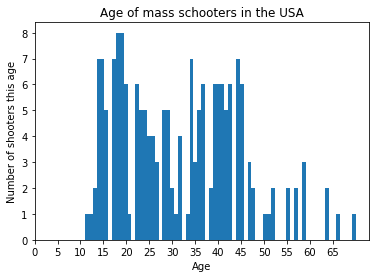

In [144]:
plt.hist(age, bins = 70)


plt.xticks(np.arange(0, 70, 5))
plt.title('Age of mass schooters in the USA')
plt.xlabel('Age')
plt.ylabel('Number of shooters this age')

plt.show()

In [145]:
fatalities = msh[['Fatalities']]
injured = msh[['Injured']]
total_victims = msh[['Total victims']]

age_again = msh[['Age']]
print(age_again)
combined = msh[['Age', 'Fatalities', 'Injured', 'Total victims']]
print(combined)
combined = combined.dropna()
print(combined)
combined = combined[~combined['Age'].str.contains(',')]
print(combined)

                  
combined['Age'] = pd.to_numeric(combined['Age'], errors=
'coerce')
combined = combined[combined['Age'] > 5]
combined = combined[combined['Total victims'] != 585]
# combined[combined['Fatalities'] + combined ['Injured'] != combined['Total victims']]


     Age
0     26
1     47
2     37
3     64
4     38
..   ...
318   14
319   23
320  NaN
321   18
322   25

[323 rows x 1 columns]
     Age  Fatalities  Injured  Total victims
0     26          26       20             46
1     47           3        0              3
2     37           3        3              6
3     64          59      527            585
4     38           3        2              5
..   ...         ...      ...            ...
318   14           1        3              4
319   23          10       13             22
320  NaN           2        4              5
321   18           5        1              6
322   25          17       32             48

[323 rows x 4 columns]
    Age  Fatalities  Injured  Total victims
0    26          26       20             46
1    47           3        0              3
2    37           3        3              6
3    64          59      527            585
4    38           3        2              5
..   ..         ...      ...            

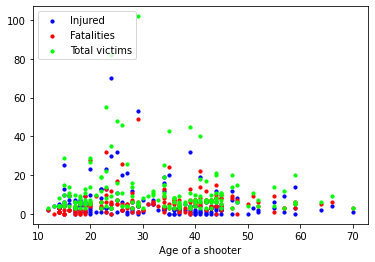

In [146]:
ax = plt.gca()
size = 10
ax.scatter(combined['Age'], combined['Injured'], color="b", label='Injured', s = size)
ax.scatter(combined['Age'], combined['Fatalities'], color="r", label='Fatalities', s = size)
ax.scatter(combined['Age'], combined['Total victims'], color="#00FF00", label='Total victims', s = size)

plt.legend(loc='upper left')
plt.xlabel('Age of a shooter')
plt.show()


In [147]:
location_comparison = msh[['Location', 'Total victims']]
print(location_comparison)
location_comparison.dropna(inplace = True) 
print(location_comparison)
location_split = location_comparison["Location"].str.split(",", n = 1, expand = True) 
location_comparison['State'] = location_split[1]
location_comparison['City'] = location_split[0]
location_comparison
del location_comparison['Location']
location_comparison['Total victims'] = location_comparison.pop('Total victims')
print(location_comparison)


                   Location  Total victims
0    Sutherland Springs, TX             46
1              Thornton, CO              3
2              Edgewood, MD              6
3             Las Vegas, NV            585
4         San Francisco, CA              5
..                      ...            ...
318       Chicago, Illinois              4
319  New Orleans, Louisiana             22
320     Spokane, Washington              5
321           Mesa, Arizona              6
322           Austin, Texas             48

[323 rows x 2 columns]
                   Location  Total victims
0    Sutherland Springs, TX             46
1              Thornton, CO              3
2              Edgewood, MD              6
3             Las Vegas, NV            585
4         San Francisco, CA              5
..                      ...            ...
318       Chicago, Illinois              4
319  New Orleans, Louisiana             22
320     Spokane, Washington              5
321           Mesa, Arizona   

c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [148]:
location_comparison = location_comparison[location_comparison['City'] != 'Washington D.C.']
print(location_comparison)
print(location_comparison[location_comparison['State'].str.contains(',')])
print(location_comparison[location_comparison['State'].str.contains('Arkansas')])

# location_comparison['State'].str.replace('TX')



           State                City  Total victims
0             TX  Sutherland Springs             46
1             CO            Thornton              3
2             MD            Edgewood              6
3             NV           Las Vegas            585
4             CA       San Francisco              5
..           ...                 ...            ...
318     Illinois             Chicago              4
319    Louisiana         New Orleans             22
320   Washington             Spokane              5
321      Arizona                Mesa              6
322        Texas              Austin             48

[277 rows x 3 columns]
                                                State          City  \
146   Souderton, Lansdale, Harleysville, Pennsylvania     Pennsburg   
175                           Albuquerque, New Mexico  South Valley   
224                           Lancaster, Pennsylvania  Nickel Mines   
240                             San Diego, California        Santee 

In [149]:
location_comparison['State'] = location_comparison['State'].str.split(",").str[-1]
print(location_comparison[location_comparison['State'].str.contains(',')])
print(location_comparison[location_comparison['State'].str.contains('Virginia')])

Empty DataFrame
Columns: [State, City, Total victims]
Index: []
              State        City  Total victims
26         Virginia    Richmond              3
49         Virginia  Woodbridge              4
71         Virginia  Chesapeake              5
98         Virginia     Roanoke              3
147   West Virginia  Morgantown              4
220        Virginia  Blacksburg             55
239        Virginia      Grundy              6


In [150]:
location_comparison['State'] = location_comparison['State'].str.replace('TX', 'Texas')
location_comparison['State'] = location_comparison['State'].str.replace('CO', 'Colorado')
location_comparison['State'] = location_comparison['State'].str.replace('MD', 'Maryland')
location_comparison['State'] = location_comparison['State'].str.replace('NV', 'Nevada')
location_comparison['State'] = location_comparison['State'].str.replace('CA', 'California')
location_comparison['State'] = location_comparison['State'].str.replace('TX', 'Texas')
location_comparison.groupby('State').sum()
location_comparison['State'] = location_comparison['State'].str.replace('LA', 'Louisiana')
location_comparison['State'] = location_comparison['State'].str.replace('PA', 'Pennsylvania')
location_comparison['State'] = location_comparison['State'].str.replace('WA', 'Washington')

location_comparison['State'] = location_comparison['State'].str.replace('Texas ', 'Texas')
location_comparison['State'] = location_comparison['State'].str.replace('  Virginia', 'Virginia')
location_comparison['State'] = location_comparison['State'].str.lstrip(' ')

location_comparison.groupby('State').count()
zeros = []
for i in range(50):
    zeros.append(0)
print(len(zeros))
print(location_comparison)

50
          State                City  Total victims
0         Texas  Sutherland Springs             46
1      Colorado            Thornton              3
2      Maryland            Edgewood              6
3        Nevada           Las Vegas            585
4    California       San Francisco              5
..          ...                 ...            ...
318    Illinois             Chicago              4
319   Louisiana         New Orleans             22
320  Washington             Spokane              5
321     Arizona                Mesa              6
322       Texas              Austin             48

[277 rows x 3 columns]


In [151]:
states_names = {'State':["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut",  "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"], 'Total victims' : zeros}
print(states_names)

{'State': ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'], 'Total victims': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [152]:
states_df = pd.DataFrame.from_dict(states_names)
# loc_comparison_wo_cities = location_comparison.drop('City', 1)
# print(loc_comparison_wo_cities)
# print(states_df)
# states_df = states_df.drop('Total victims', 1)
# print(states_df)
print(states_df)
print(location_comparison.groupby('State').count())


             State  Total victims
0           Alaska              0
1          Alabama              0
2         Arkansas              0
3          Arizona              0
4       California              0
5         Colorado              0
6      Connecticut              0
7         Delaware              0
8          Florida              0
9          Georgia              0
10          Hawaii              0
11            Iowa              0
12           Idaho              0
13        Illinois              0
14         Indiana              0
15          Kansas              0
16        Kentucky              0
17       Louisiana              0
18   Massachusetts              0
19        Maryland              0
20           Maine              0
21        Michigan              0
22       Minnesota              0
23        Missouri              0
24     Mississippi              0
25         Montana              0
26  North Carolina              0
27    North Dakota              0
28        Nebr

In [153]:
states_counted = location_comparison.groupby('State').count().drop('City', 1)
states_counted.rename(columns = {'Total victims' : 'Number of shootings'}, inplace = True)
print(states_counted)
other_counted = states_df.groupby('State').sum()
print(other_counted)
states_counted.index

                Number of shootings
State                              
Alabama                           9
Alaska                            1
Arizona                          11
Arkansas                          2
California                       31
Colorado                          7
Connecticut                       3
Florida                          20
Georgia                          13
Hawaii                            1
Idaho                             1
Illinois                          9
Indiana                           1
Iowa                              1
Kansas                            4
Kentucky                          5
Louisiana                         5
Maine                             1
Maryland                          1
Massachusetts                     4
Michigan                          6
Minnesota                         4
Mississippi                       4
Missouri                          3
Montana                           2
Nebraska                    

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [154]:
all_states = states_counted.merge(other_counted, on = ['State'], how = 'right')
all_states.info()
all_states.fillna(0, inplace = True)
all_states.drop('Total victims', inplace = True, axis = 1)
all_states['Number of shootings'] = all_states['Number of shootings'].astype(int)




<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Rhode Island
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number of shootings  46 non-null     float64
 1   Total victims        50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


In [155]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [156]:
all_states = all_states.reset_index()
print(all_states)

             State  Number of shootings
0          Alabama                    9
1           Alaska                    1
2          Arizona                   11
3         Arkansas                    2
4       California                   31
5         Colorado                    7
6      Connecticut                    3
7          Florida                   20
8          Georgia                   13
9           Hawaii                    1
10           Idaho                    1
11        Illinois                    9
12         Indiana                    1
13            Iowa                    1
14          Kansas                    4
15        Kentucky                    5
16       Louisiana                    5
17           Maine                    1
18        Maryland                    1
19   Massachusetts                    4
20        Michigan                    6
21       Minnesota                    4
22     Mississippi                    4
23        Missouri                    3


In [157]:
all_states['code'] = all_states['State'].replace(us_state_abbrev, regex  = True)

all_states.iloc[43, 2] = 'WV'
print(all_states)

             State  Number of shootings code
0          Alabama                    9   AL
1           Alaska                    1   AK
2          Arizona                   11   AZ
3         Arkansas                    2   AR
4       California                   31   CA
5         Colorado                    7   CO
6      Connecticut                    3   CT
7          Florida                   20   FL
8          Georgia                   13   GA
9           Hawaii                    1   HI
10           Idaho                    1   ID
11        Illinois                    9   IL
12         Indiana                    1   IN
13            Iowa                    1   IA
14          Kansas                    4   KS
15        Kentucky                    5   KY
16       Louisiana                    5   LA
17           Maine                    1   ME
18        Maryland                    1   MD
19   Massachusetts                    4   MA
20        Michigan                    6   MI
21       M

In [158]:
fig = go.Figure(data=go.Choropleth(
    locations=all_states['code'], # Spatial coordinates
    z = all_states['Number of shootings'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of shootings",
))

fig.update_geos(
    showlakes=False
)

fig.update_layout(
    title_text = '1966-2017 US Mass Shootings by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [159]:
url_sp = "https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population"

url_sp = requests.get("https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population").text
soup = BeautifulSoup(url_sp, 'html.parser')
print(soup.prettify())



<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of states and territories of the United States by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YA6-oApAICgAAA06iRoAAAAI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_states_and_territories_of_the_United_States_by_population","wgTitle":"List of states and territories of the United States by population","wgCurRevisionId":1002485226,"wgRevisionId":1002485226,"wgArticleId":87525,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All art

In [160]:
soup.title.string

'List of states and territories of the United States by population - Wikipedia'

In [161]:
all_tables=soup.find_all('table')
all_tables

[<table class="wikitable sortable" style="width:100%; text-align:center;">
 <tbody><tr style="vertical-align: top;">
 <th colspan="2" style="vertical-align: middle">Rank
 </th>
 <th rowspan="2" style="vertical-align: middle">State or territory
 </th>
 <th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Census population</div>
 </th>
 <th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Change, 2010–2020</div>
 </th>
 <th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;"><a href="/wiki/United_States_House_of_Representatives" title="United States House of Representatives">U.S. House of R.</a></div>
 </th>
 <th rowspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Est. pop.<br/>per electoral<br/>vote, 2020<sup class="reference" id="cite_ref-8

In [162]:
right_table=soup.find('table', {"class":'wikitable sortable'})
right_table

<table class="wikitable sortable" style="width:100%; text-align:center;">
<tbody><tr style="vertical-align: top;">
<th colspan="2" style="vertical-align: middle">Rank
</th>
<th rowspan="2" style="vertical-align: middle">State or territory
</th>
<th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Census population</div>
</th>
<th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Change, 2010–2020</div>
</th>
<th colspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;"><a href="/wiki/United_States_House_of_Representatives" title="United States House of Representatives">U.S. House of R.</a></div>
</th>
<th rowspan="2" style="vertical-align: middle"><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Est. pop.<br/>per electoral<br/>vote, 2020<sup class="reference" id="cite_ref-8"><a href="#c

In [163]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

16

In [164]:
rows = right_table.findAll("tr")
len(rows)

62

In [165]:
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)
print('------------')
print(len(header))

['Rank', 'State or territory', 'Census population', 'Change, 2010–2020', 'U.S. House of R.', 'Est. pop.per electoralvote, 2020[a]', 'Census pop. per seat', '% of the total U.S. pop.[b]', '% of ElectoralCollege']
------------
9


In [166]:
lst_data = []
for row in rows[1:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)
lst_data[0:3]

[[],
 ['1',
  '1',
  '\xa0California',
  '39,368,078',
  '37,253,956',
  '5.7%',
  '+2,114,122',
  '53',
  '12.18%',
  '715,783',
  '742,794',
  '702,905',
  '11.82%',
  '11.91%',
  '–0.09%',
  '10.22%'],
 ['2',
  '2',
  '\xa0Texas',
  '29,360,759',
  '25,145,561',
  '16.8%',
  '+4,215,198',
  '36',
  '8.28%',
  '772,652',
  '815,577',
  '698,488',
  '8.82%',
  '8.04%',
  '0.78%',
  '7.06%']]

In [167]:
len(lst_data[1])

16

In [168]:
list_row = []
for row in right_table.findAll("tr"):
    list_row.append(row)

    
print('Number of row :',len(list_row))
print('----------------')
print(list_row[1])
print('----------------')
print('Second Attribute is has link reference')
print('----------------')
print(list_row[1].findAll('th'))
print('----------------')
print(list_row[1].find('a').text)

Number of row : 62
----------------
<tr>
<th>Current
</th>
<th>2010
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Estimated<br/>July 1, 2020<sup class="reference" id="cite_ref-Census2020_10-0"><a href="#cite_note-Census2020-10">[8]</a></sup></div>
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">April 1, 2010<sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[9]</a></sup></div>
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">%<sup class="reference" id="cite_ref-:0_12-0"><a href="#cite_note-:0-12">[c]</a></sup></div>
</th>
<th>Absolute
</th>
<th>Seats
</th>
<th>%
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Est. 2020</div>
</th>
<th>2010
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Est. 2020</div>
</th>
<th>2010
</th>
<th><div style="display:inline-block; padding:0.1em 0;line-height:1.2em;">Change,<br/>2010–20

In [169]:
c1=[]
c2=[]

for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==16: #Only extract table body not heading

        c1.append(cells[2].find('a').text)  # fetch the text of the url in td tag. 
        c2.append(cells[3].find(text=True))


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
d = dict([(x,0) for x in header])
d

In [ ]:
d['Rank'] = c1
d['Country(or dependent territory)']= c2
d['Population']=c3
d['Date']=c4
d['% of worldpopulation']=c5
d['Source']=c6
d['SourceLink']=c7

In [ ]:

# convert dict to DataFrame
df_table = pd.DataFrame(d)

# Top 5 records
df_table.head(5)

In [ ]:
# table = soup.find('table',{'class':'wikitable sortable jquery-tablesorter'})
# for row in table.findAll("tr"):
#     cells = row.findAll('td')

# len(cells)
# rows = table.findAll("tr")
# print(rows)
# header = [th.text.rstrip() for th in rows[0].find_all('th')]
# print(header)


In [ ]:
msh_geo = msh[['Total victims', 'Race', 'Latitude', 'Longitude']]
msh_geo = msh_geo.dropna()
print(msh_geo)


In [ ]:
print(msh_geo.groupby('Race').count())

In [ ]:
msh_geo['Race'] = msh_geo['Race'].replace('Black American or African American/Unknown', 'Black')
msh_geo['Race'] = msh_geo['Race'].replace('black', 'Black')
msh_geo['Race'] = msh_geo['Race'].replace('Black American or African American', 'Black')
msh_geo['Race'] = msh_geo['Race'].replace('Asian American', 'Asian')
msh_geo['Race'] = msh_geo['Race'].replace('Asian American/Some other race', 'Asian')
msh_geo['Race'] = msh_geo['Race'].replace('white', 'White')
msh_geo['Race'] = msh_geo['Race'].replace('White American or European American/Some other Race', 'White')
msh_geo['Race'] = msh_geo['Race'].replace('White American or European American', 'White')
msh_geo['Race'] = msh_geo['Race'].replace('Some other race', 'Other')
msh_geo



print(msh_geo.groupby('Race').count())

In [170]:
print(msh_geo)

          country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  

In [181]:
mapbox_access_token = 'pk.eyJ1Ijoia2VyZXBzYWsiLCJhIjoiY2trY253MmZkMDFsMjJ3cGdmbWE1MnZmbiJ9.-Dwga-wEYhIglmnKPVd-rw'
# msh_geo = px.data.gapminder()
# fig = px.scatter_geo(
#                     msh_geo,
#                     locationmode = 'USA-states',
#                     lat = msh_geo['Latitude'],
#                         lon = msh_geo['Longitude'],

# #                     color = msh_geo['Race'], # which column to use to set the color of markers
#             marker = dict(
#             size = msh_geo['Total victims']/scale,
#             color = colors[i],
#             line_color='rgb(40,40,40)',
#             line_width=0.5,
#             sizemode = 'area'
#         ),
#                     hover_name="state", # column added to hover information
#                     projection="natural earth")
# fig.update_layout(
#         title_text = '1966-2010 US Mass Shootings <br>(Click legend to toggle traces)',
#         showlegend = True,
#         geo = dict(
#             scope = 'usa',
#             landcolor = 'rgb(217, 217, 217)',
#         )
#     )

# fig.show()
fig = go.Figure(go.Scattermapbox(

        mode ='markers',

        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(

        ),
        pitch=0,
        zoom=5
    )
)

fig.show()


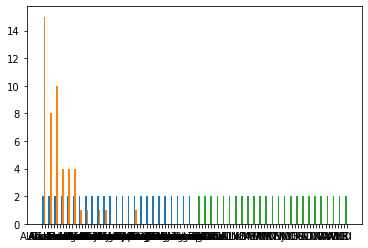

In [182]:
plt.hist(all_states, bins = 50)
plt.show()

In [183]:
sum_zeros = states_df.groupby('State').sum()
print(sum_zeros)

                Total victims
State                        
Alabama                     0
Alaska                      0
Arizona                     0
Arkansas                    0
California                  0
Colorado                    0
Connecticut                 0
Delaware                    0
Florida                     0
Georgia                     0
Hawaii                      0
Idaho                       0
Illinois                    0
Indiana                     0
Iowa                        0
Kansas                      0
Kentucky                    0
Louisiana                   0
Maine                       0
Maryland                    0
Massachusetts               0
Michigan                    0
Minnesota                   0
Mississippi                 0
Missouri                    0
Montana                     0
Nebraska                    0
Nevada                      0
New Hampshire               0
New Jersey                  0
New Mexico                  0
New York  

In [184]:
sum_loc = location_comparison.groupby('State').sum()
print(sum_loc)
# print(location_comparison)
# states_df = states_df.update(location_comparison.groupby.sum())
# states_df


                Total victims
State                        
Alabama                    55
Alaska                      4
Arizona                    65
Arkansas                   18
California                375
Colorado                  151
Connecticut                44
Florida                   252
Georgia                    81
Hawaii                      7
Idaho                       4
Illinois                   75
Indiana                     5
Iowa                        6
Kansas                     43
Kentucky                   42
Louisiana                  53
Maine                       3
Maryland                    6
Massachusetts              27
Michigan                   36
Minnesota                  31
Mississippi                33
Missouri                   19
Montana                     8
Nebraska                   26
Nevada                    612
New Jersey                 12
New Mexico                 12
New York                   92
North Carolina             59
Ohio      

In [185]:
# for state in states_df:
#     if state not in location_comparison:
#         location_comparison = location_comparison.append(state, ignore_index=True)
# print(location_comparison)
# location_comparison.groupby('State').sum()
for state in sum_zeros.index:
    print(state)
    if state not in sum_loc.index:
        sum_loc = sum_loc.append(state, ignore_index=True)
print(sum_loc)
print(sum_zeros)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [ ]:
print(location_comparison)

In [ ]:
msh.info()

In [218]:
date_fat = msh[['Date', 'Total victims']]
print(date_fat)
date_fat['Date'] = date_fat['Date'].str[-4:]
date_fat

           Date  Total victims
0     11/5/2017             46
1     11/1/2017              3
2    10/18/2017              6
3     10/1/2017            585
4     6/14/2017              5
..          ...            ...
318   1/17/1974              4
319  12/31/1972             22
320  11/11/1971              5
321  11/12/1966              6
322    8/1/1966             48

[323 rows x 2 columns]


c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Total victims
0,2017,46
1,2017,3
2,2017,6
3,2017,585
4,2017,5
...,...,...
318,1974,4
319,1972,22
320,1971,5
321,1966,6


In [230]:
g_date_fat = date_fat.groupby('Date').count()
print(g_date_fat)
print(len(g_date_fat))
g_date_fat.reset_index(level=0, inplace=True)

      Total victims
Date               
1966              2
1971              1
1972              1
1974              2
1976              2
1979              2
1982              2
1983              2
1984              3
1985              2
1986              3
1987              1
1988              6
1989              3
1990              1
1991              5
1992              4
1993              9
1994              4
1995              4
1996              3
1997              6
1998              5
1999              7
2000              1
2001              2
2002              2
2003              3
2004              2
2005              3
2006              7
2007             10
2008              6
2009              8
2010              2
2011              6
2012             15
2013             16
2014             14
2015             67
2016             69
2017             10
42


In [231]:
sum = 0
dykta = {'Increase' : []}
for i in g_date_fat['Total victims']:
    sum += i
    dykta['Increase'].append(sum)
print(dykta)

{'Increase': [2, 3, 4, 6, 8, 10, 12, 14, 17, 19, 22, 23, 29, 32, 33, 38, 42, 51, 55, 59, 62, 68, 73, 80, 81, 83, 85, 88, 90, 93, 100, 110, 116, 124, 126, 132, 147, 163, 177, 244, 313, 323]}


In [232]:
dykta_df = pd.DataFrame.from_dict(dykta)
print(dykta_df)

    Increase
0          2
1          3
2          4
3          6
4          8
5         10
6         12
7         14
8         17
9         19
10        22
11        23
12        29
13        32
14        33
15        38
16        42
17        51
18        55
19        59
20        62
21        68
22        73
23        80
24        81
25        83
26        85
27        88
28        90
29        93
30       100
31       110
32       116
33       124
34       126
35       132
36       147
37       163
38       177
39       244
40       313
41       323


In [233]:
g_date_fat = pd.concat([g_date_fat, dykta_df], axis=1, join="inner")
print(g_date_fat)

    Date  Total victims  Increase
0   1966              2         2
1   1971              1         3
2   1972              1         4
3   1974              2         6
4   1976              2         8
5   1979              2        10
6   1982              2        12
7   1983              2        14
8   1984              3        17
9   1985              2        19
10  1986              3        22
11  1987              1        23
12  1988              6        29
13  1989              3        32
14  1990              1        33
15  1991              5        38
16  1992              4        42
17  1993              9        51
18  1994              4        55
19  1995              4        59
20  1996              3        62
21  1997              6        68
22  1998              5        73
23  1999              7        80
24  2000              1        81
25  2001              2        83
26  2002              2        85
27  2003              3        88
28  2004      

In [234]:
g_date_fat = g_date_fat.drop(['Total victims'], axis=1)
print(g_date_fat)

    Date  Increase
0   1966         2
1   1971         3
2   1972         4
3   1974         6
4   1976         8
5   1979        10
6   1982        12
7   1983        14
8   1984        17
9   1985        19
10  1986        22
11  1987        23
12  1988        29
13  1989        32
14  1990        33
15  1991        38
16  1992        42
17  1993        51
18  1994        55
19  1995        59
20  1996        62
21  1997        68
22  1998        73
23  1999        80
24  2000        81
25  2001        83
26  2002        85
27  2003        88
28  2004        90
29  2005        93
30  2006       100
31  2007       110
32  2008       116
33  2009       124
34  2010       126
35  2011       132
36  2012       147
37  2013       163
38  2014       177
39  2015       244
40  2016       313
41  2017       323


c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



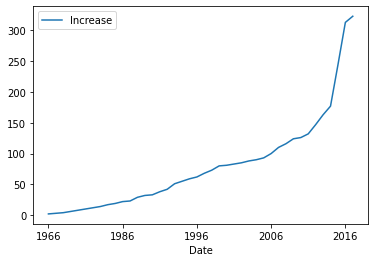

In [237]:
ax = plt.gca()

g_date_fat.plot(kind='line',x='Date',y='Increase',ax=ax)


plt.show()

In [ ]:
print(dates_zeros)

In [ ]:
print(dates_zeros.info())

In [ ]:
dates_zeros['Date'] = dates_zeros['Date'].apply(str)
print(dates_zeros)
print(dates_zeros.info())
print(g_date_fat.info())

In [ ]:
for date in dates_zeros:
    if date not in g_date_fat['Date']:
        g_date_fat = g_date_fat.append(date, ignore_index=True)
print(g_date_fat)

In [ ]:
x = g_date_fat['Date']
y = g_date_fat['Fatalities']

plt.hist(g_date_fat['Date'], weights=g_date_fat['Fatalities'], bins = 42)
plt.xticks(np.arange(0, 42, 10))

plt.show()

In [ ]:
# pd.concat([Series(row['var2'], row['var1'].split(','))              
#                     for _, row in a.iterrows()]).reset_index()

# pd.concat(Series[age['kolumna'], age['Age'].split(',')
# print(age)

In [ ]:
# age.to_csv(r'C:\Users\Dom\Data Science Projects\Mass Shootings in the USA\agecsv.csv')

In [ ]:
# msh.loc[253]

In [ ]:
# print(age)
# print('\n')
# print(age.info())
# print('\n')
# print(age.describe())
# print('\n')
# def checker(txt):
#     try:
#         float(txt)
#         return False
#     except:
#         return True

# two_killers = age[age['Age'].apply(checker)]
# print(two_killers)
# print(type(two_killers))


In [ ]:






















































# print (two_killers[two_killers['Age'].apply(type) == type('s')])

In [ ]:

# index_two_killers = two_killers.index.values
# two_killers['index_two_killers'] = index_two_killers
# print(two_killers)
# new_df = pd.DataFrame(two_killers.Age.str.split(',').tolist(), index = two_killers.index_two_killers).stack()
# new_df = new_df.reset_index([0, 'index_two_killers'])
# new_df.columns = ['index_two_killers', 'Age']
# new_df.set_index('index_two_killers')
# print(new_df)
# print(new_df.info())
# print('\n')
# age

In [ ]:
# plt.hist(age, bins = 70)

# x_ticks = np.arange(0, 50, 10)
# plt.xticks(x_ticks)
# plt.show()

In [ ]:













































ó
ó